In [2]:
#!pip3 install ipympl

In [3]:
#%matplotlib widget

%matplotlib notebook

In [237]:
import math
import pandas
from matplotlib import pyplot
import glob
import colorsys
from PIL import Image, ImageDraw
#%matplotlib inl ine
plt = pyplot

a= glob.glob("../../*/exxport_map_D_*.csv")
a.sort()
a 


['../../Downloads/exxport_map_D_domov_bike_16_01_2022.csv',
 '../../Downloads/exxport_map_D_domov_fast_16_01_2022.csv',
 '../../Downloads/exxport_map_D_domov_tourist_16_01_2022.csv',
 '../../Downloads/exxport_map_D_domov_turist_16_01_2022.csv',
 '../../Downloads/exxport_map_D_smichov_auto_16_01_2022.csv',
 '../../Downloads/exxport_map_D_smichov_bike_16_01_2022.csv',
 '../../Downloads/exxport_map_D_smichov_tourist_16_01_2022.csv',
 '../../Downloads/exxport_map_D_smichov_turist_16_01_2022.csv',
 '../../Downloads/exxport_map_D_zlichov_auto_16_01_2022.csv',
 '../../Downloads/exxport_map_D_zlichov_bike_16_01_2022.csv',
 '../../Downloads/exxport_map_D_zlichov_tourist_16_01_2022.csv',
 '../../Downloads/exxport_map_D_zlichov_turist_16_01_2022.csv']

In [66]:
data1 = pandas.read_csv("../../Downloads/export_map_smichov_11_01_2022.csv")
data2 = pandas.read_csv("../../Downloads/export_map_podoli_11_01_2022.csv")
data1,data2 = data2,data1
data = pandas.read_csv("../../Downloads/export_map_smichov_11_01_2022.csv")
#data = pandas.read_csv("")
data["time"] = (data1["time"]+data2["time"]-abs(data1["time"]-data2["time"]))/2

print(
max(data["long"]),
min(data["lat"]),
    min(data["long"]),
max(data["lat"]))

50.0701578 14.37708 50.03680110000016 14.443902199999982


In [67]:
my_long,my_lat = my_coord = 14.4312586, 50.0553914

#data["ratio"] =(data["time"]/( (data["long"]-my_long)**2 + (data["lat"]-my_lat)**2)**0)**.3
data["ratio"] = data1["time"]-data2["time"]
print(max(data["ratio"]))
#data["ratio"] = data["ratio"] + abs (data["ratio"])




time_min,time_max = min(data["time"]),max(data["time"])
ratio_min,ratio_max = min(data["ratio"]),max(data["ratio"])

data["T"] = (data["time"]-time_min)/(time_max-time_min)
data["R"] = (data["ratio"]-ratio_min)/(ratio_max-ratio_min)


data1["T"] = (data1["time"]-data1["time"].min())/(data1["time"].max()-data1["time"].min())
data2["T"] = (data2["time"]-data2["time"].min())/(data2["time"].max()-data2["time"].min())

2890


<IPython.core.display.Javascript object>


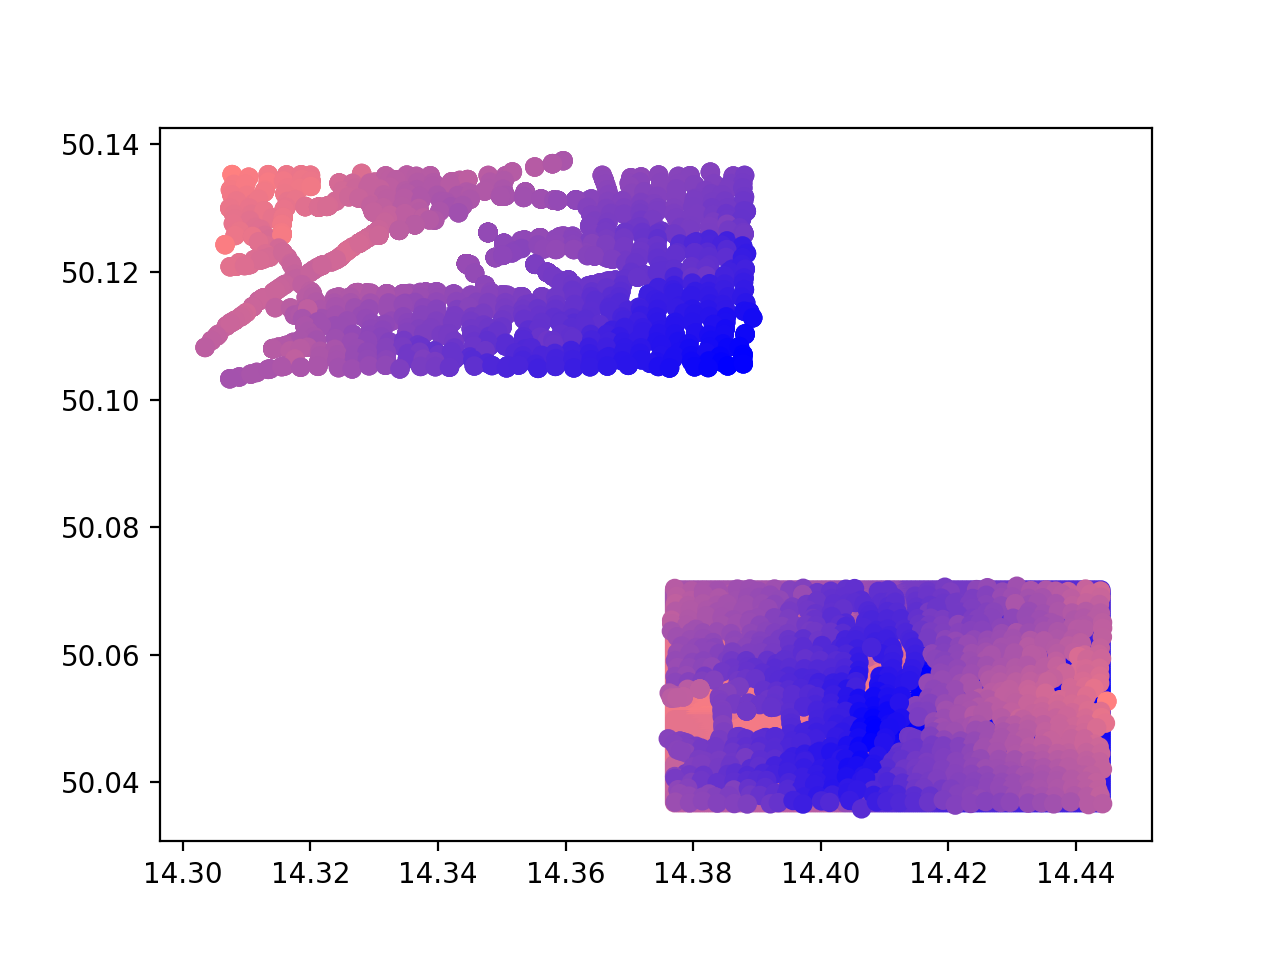

In [68]:
#pyplot.scatter(data["lat"],data["long"],c=[colorsys.hsv_to_rgb((value*.7+.3)%1,1,1) for value in data1["T"]])
pyplot.scatter(data["lat"],data["long"],c=[(value,value/2,1-value/2) for value in data["R"]])


#pyplot.scatter(*my_coord,"o",c=((0,0,0),))
pyplot.gca().set_aspect('equal', adjustable='box')
pyplot.show()

In [86]:
#fig,ax = pyplot.subplots()
for i,row in data.iterrows():
    dist = (row["lat"]-my_lat)**2 + (row["long"]-my_long)**2
    value = row["R"]
    if not 0<=value<=1:
        continue
    colour = colorsys.hsv_to_rgb(value,1,1)
    #colour = (value,value,1-(value/2)**3)
    pyplot.plot(row["lat"],row["long"],c=colour)
    
    
#def onclick(event):
#    print('%s click: button=%d, x=%d, y=%d, xdata=%f, ydata=%f' %
#          ('double' if event.dblclick else 'single', event.button,
#           event.x, event.y, event.xdata, event.ydata))
#cid = fig.canvas.mpl_connect('button_press_event', onclick)
pyplot.plot(*my_coord,"o",c=(0,0,0))
pyplot.gca().set_aspect('equal', adjustable='box')

#plt.axis('square')
pyplot.savefig("_.png")

In [232]:
sorted(glob.glob("*.png"))

['_.png',
 'cesko_auto.png',
 'home_bike_nothing.png',
 'home_bike_smichov.png',
 'home_bike_zlichov.png',
 'home_fast.png',
 'home_fast_nothing.png',
 'home_fast_smichov.png',
 'home_fast_zlichov.png',
 'home_tour_nothing.png',
 'home_tour_smichov.png',
 'home_tour_zlichov.png',
 'home_tourist.png',
 'home_tur_nothing.png',
 'home_tur_smichov.png',
 'home_tur_zlichov.png',
 'kalibrace_home_fast.png',
 'klic_reka.png']

In [198]:
def my_min(a,b):
    return .5*((a+b)-abs(a-b))


1.0

<IPython.core.display.Javascript object>


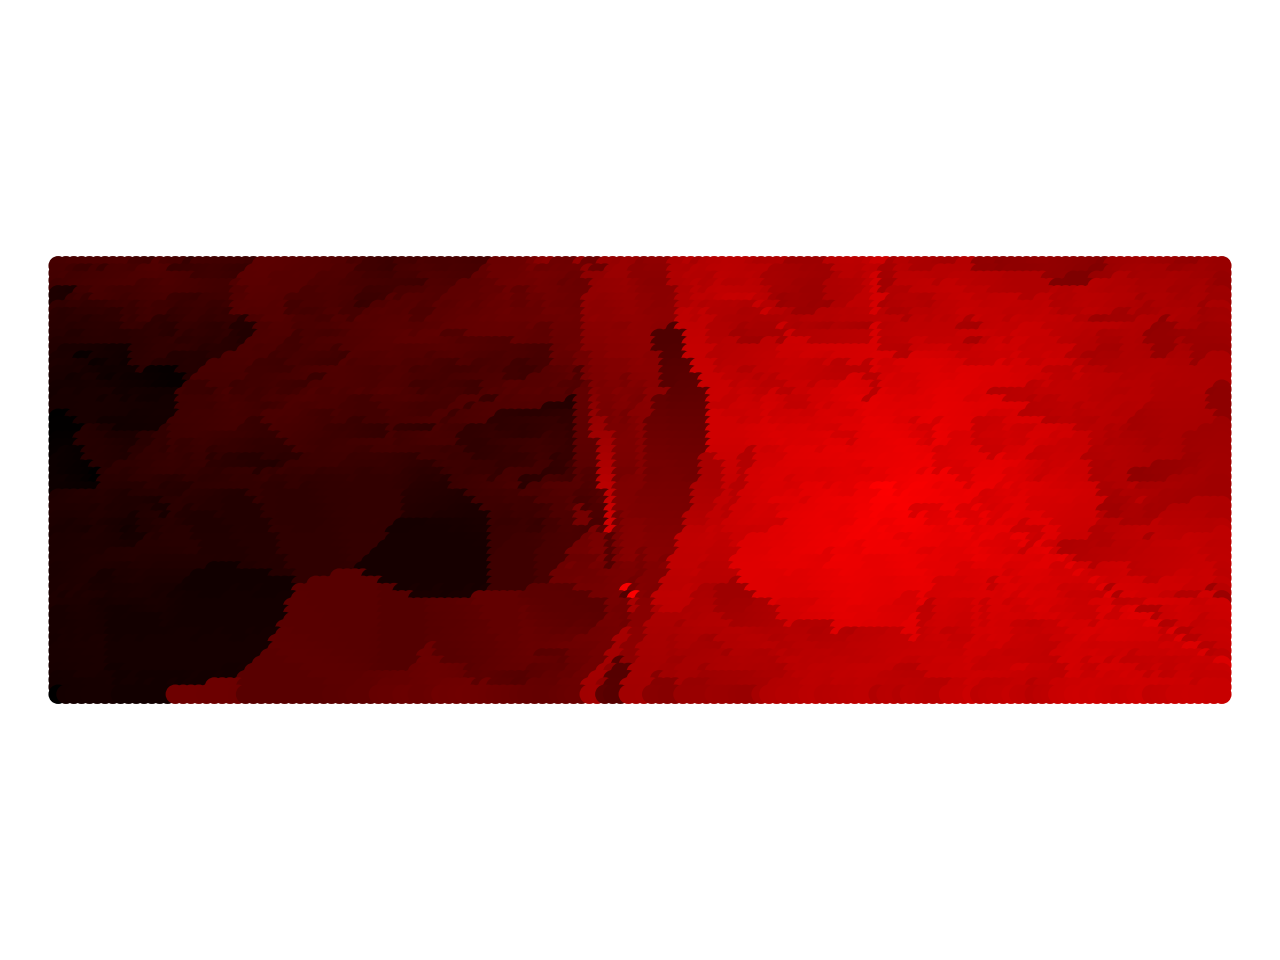

In [284]:
fig = plt.figure(frameon=False)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)

data = pandas.read_csv("../../Downloads/exxport_map_D_domov_fast_16_01_2022.csv")
maximal = max(data["time"])
data_secondary = pandas.read_csv("../../Downloads/exxport_map_DT_jih_17_01_2022.csv")
data_tercial = pandas.read_csv("../../Downloads/exxport_map_DT_sever_17_01_2022.csv")

diff_sec = diff_terc = 7
data["time"] = my_min(my_min(data["time"],data_secondary["time"]+diff_sec*60),data_tercial["time"]*diff_terc)

convertor = lambda long:math.sin(long/180*math.pi)*long
colour = lambda v:((1-v)**1,0,0)
data["Y"] = data["lat"]
data["X"] = list(map(convertor,data["long"]))


data["T"] = data["time"]/maximal
ax.scatter(data["Y"],data["X"],c=[colour(value) for value in data["T"]])

#ax.scatter([14.3892031,14.4305306],[convertor(50.0584069),convertor( 50.0628700)],c=[(1,0,0),(0,1,0)])


fig.gca().set_aspect('equal', adjustable='box')


#pyplot.savefig("czechi.png",bbox_inches='tight')


In [262]:
def graf2mapa(path):
    data = Image.open(path).convert("RGB")
    mapa = Image.open("../Screenshot 2022-01-16 at 20.40.35.png").convert("RGB")
    #reka = Image.open("klic_reka.png")
    mapa.putalpha(30)
    data.putalpha(255)

    data = data.resize((2322, 1016))
    data = data.crop((135,89,2200,926))
    data = data.resize((2322, 1016))

    #data,mapa = mapa,data
    #mapa.paste(data,(0,0),data)
    #data 
    img = Image.alpha_composite(Image.alpha_composite(data,mapa),reka)
    
    draw = ImageDraw.Draw(img)
    X,Y,s= 1650,520,20
    draw.ellipse((X-s,Y-s,X+s,Y+s),fill=(255,255,255))
    
    return img


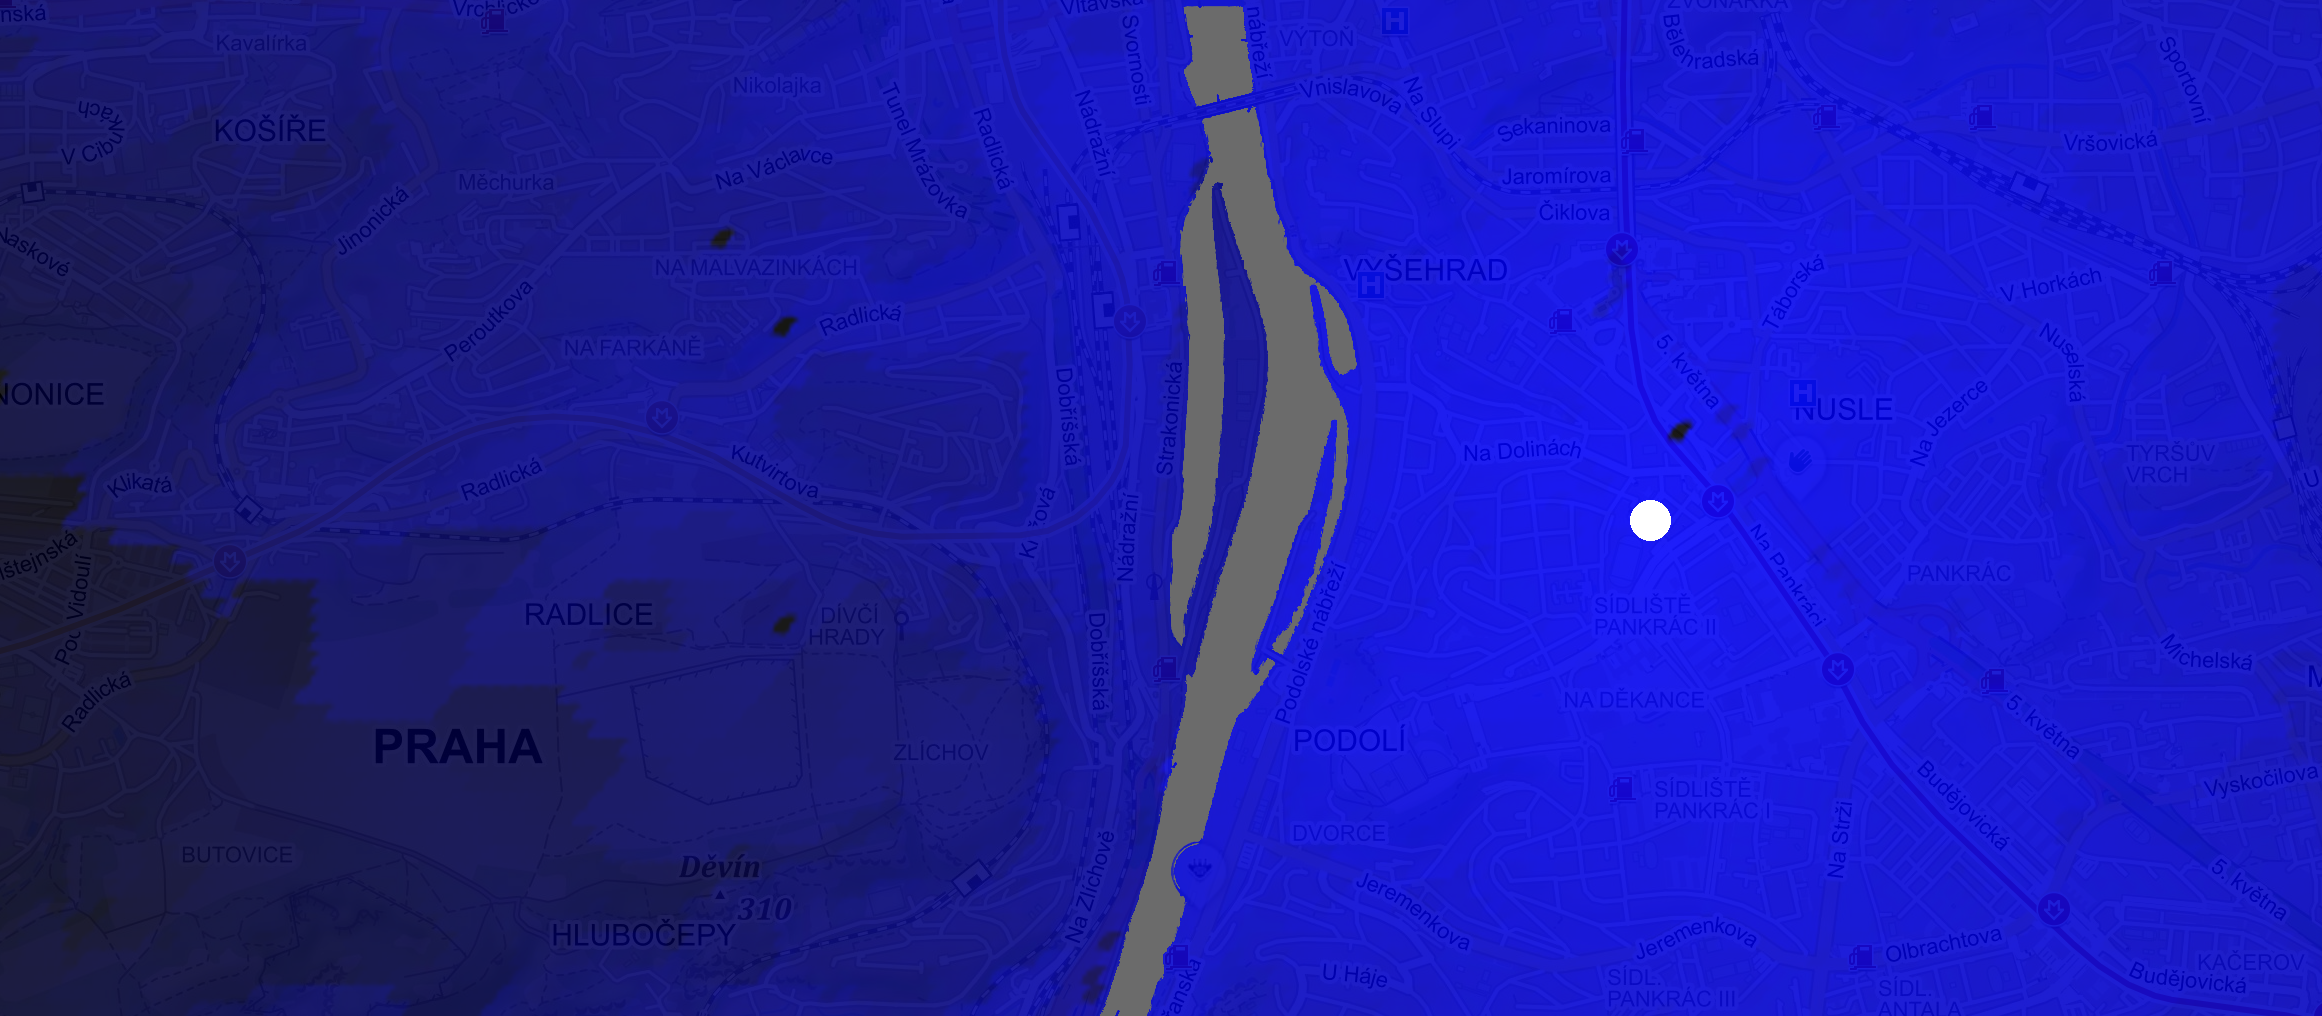

In [261]:
a = graf2mapa('home_bike_nothing.png')
draw = ImageDraw.Draw(a)
X,Y,s= 1650,520,20
draw.ellipse((X-s,Y-s,X+s,Y+s),fill=(255,255,255))
a

In [263]:
l = ['home_bike_nothing.png',
 'home_bike_smichov.png',
 'home_bike_zlichov.png',

 'home_fast_nothing.png',
 'home_fast_smichov.png',
 'home_fast_zlichov.png',
 
 'home_tur_nothing.png',
 'home_tur_smichov.png',
 'home_tur_zlichov.png',]
for i in l:
    img = graf2mapa(i)
    img.save("out/"+i)
    
    